In [1]:
from yellowbrick.text import TSNEVisualizer,UMAPVisualizer
from scipy.sparse import load_npz
import ast

In [63]:
import pandas as pd
articles = pd.read_csv('../models/test.csv')

In [23]:
def find_primary_category(categories):
    import ast
    try:
        return [x[5:] for x in ast.literal_eval(categories) if x[:5] == 'math.'][0]
    except: pass

In [24]:
def check_category(categories, subcategory):
    import ast
    try:
        return subcategory in [x[5:] for x in ast.literal_eval(categories) if x[:5] == 'math.']
    except: pass

In [44]:
subset = []

In [45]:
subset.extend(list(articles.loc[(articles.categories.apply(lambda x: check_category(x, 'AG'))) & (articles.categories.apply(lambda x: check_category(x, 'RT')))].index)[:500])

In [46]:
subset.extend(list(articles.loc[(articles.categories.apply(lambda x: check_category(x, 'AG'))) & ~(articles.categories.apply(lambda x: check_category(x, 'RT')))].index)[:500])

In [47]:
subset.extend(list(articles.loc[~(articles.categories.apply(lambda x: check_category(x, 'AG'))) & (articles.categories.apply(lambda x: check_category(x, 'RT')))].index)[:500])

In [48]:
articles.loc[subset[:500], 'second_category'] = 'both'
articles.loc[subset[500:1000], 'second_category'] = 'AG'
articles.loc[subset[1000:1500], 'second_category'] = 'RT'

In [64]:
articles.loc[:,'primary_category'] = articles.loc[:, 'categories'].apply(find_primary_category)

In [9]:
tfidf = load_npz('../trained_models/tfidf.npz')

In [152]:
tfidf_new = load_npz('../trained_models/tfidf_new.npz')

In [28]:
import pickle

In [55]:
with open('../models/tf_vect.pickle', 'rb') as pickle_file:
    tf_vect = pickle.load(pickle_file)

In [56]:
with open('../models/tf_vect_res.pickle', 'rb') as pickle_file:
    tf_vect_res = pickle.load(pickle_file)

In [13]:
def create_subset(categories):
    subset = []
    for category in categories:
        subset.extend(list(articles.loc[articles.primary_category == category].index)[:500])
    return subset

In [71]:
subset = create_subset(['AT', 'KT'])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


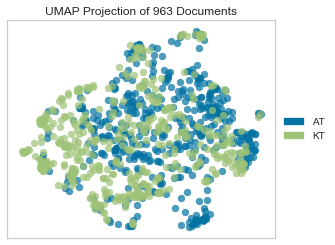

In [72]:
umap = UMAPVisualizer()
#umap.fit(tfidf[subset, :], articles.loc[subset, 'primary_category'])
umap.fit(tf_vect.transform(articles.loc[subset, 'abstract']), articles.loc[subset, 'primary_category'])
umap.poof()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


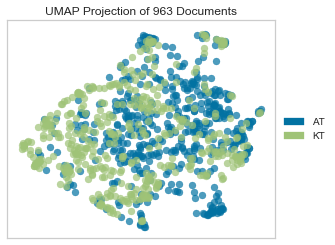

In [73]:
umap = UMAPVisualizer()
#umap.fit(tfidf[subset, :], articles.loc[subset, 'primary_category'])
umap.fit(tf_vect_res.transform(articles.loc[subset, 'abstract']), articles.loc[subset, 'primary_category'])
umap.poof()

In [16]:
import fastText as ft

In [75]:
#loaded_model = ft.load_model('../category-prediction/model_abstract.bin')
loaded_model = ft.load_model('../models/ft_model.bin')
loaded_model_res = ft.load_model('../models/ft_model_res.bin')

In [76]:
def get_sentence_vector(abstract, model):
    return model.get_sentence_vector(abstract.replace('\n', ' '))

In [20]:
import numpy as np

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


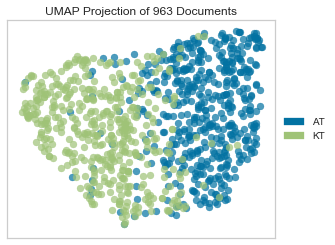

In [79]:
umap = UMAPVisualizer()
umap.fit(np.vstack(articles.loc[subset,'abstract'].apply(lambda x: get_sentence_vector(x,loaded_model)).values), articles.loc[subset, 'primary_category'])
umap.poof()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


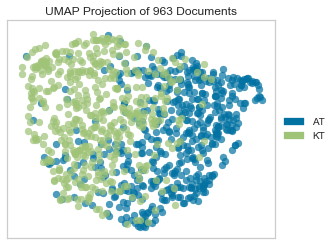

In [80]:
umap = UMAPVisualizer()
umap.fit(np.vstack(articles.loc[subset,'abstract'].apply(lambda x: get_sentence_vector(x,loaded_model_res)).values), articles.loc[subset, 'primary_category'])
umap.poof()

In [244]:
articles['vector'] = articles.loc[:,'abstract'].apply(get_sentence_vector)

In [237]:
from sklearn.metrics.pairwise import cosine_similarity

In [177]:
import random

In [250]:
i = random.choice(range(len(articles)))
abstract = articles.loc[i, 'abstract']
print(articles.loc[i, 'title'])
print(abstract)
cosine_similarities = cosine_similarity(get_sentence_vector(abstract).reshape(1, -1), np.matrix(np.vstack(articles.loc[:, 'vector'].values))).flatten()

Cohomology of Spaltenstein varieties
We give a presentation for the cohomology algebra of the Spaltenstein variety
of all partial flags annihilated by a fixed nilpotent matrix, generalizing the
description of the cohomology algebra of the Springer fiber found by De
Concini, Procesi and Tanisaki.


In [251]:
cosine_similarities

array([0.6943883 , 0.65559995, 0.64992386, ..., 0.74349666, 0.78663856,
       0.62158537], dtype=float32)

In [252]:
related_docs_indices = cosine_similarities.argsort()[:-11:-1]

In [253]:
related_docs_indices

array([137980,  54850, 133799, 133298, 140716, 232424,  55124, 190686,
        83436,  10187])

In [257]:
i = 3
print('Title: ', articles.loc[related_docs_indices[i], 'title'])
print('Abstract: ', articles.loc[related_docs_indices[i], 'abstract'])

Title:  Yangians and cohomology rings of Laumon spaces
Abstract:  Laumon moduli spaces are certain smooth closures of the moduli spaces of maps
from the projective line to the flag variety of $GL_n$. We construct the action
of the Yangian of $sl_n$ in the cohomology of Laumon spaces by certain natural
correspondences. We construct the action of the affine Yangian (two-parametric
deformation of the universal enveloping algebra of the universal central
extension of $sl_n[s^{\pm1},t]$) in the cohomology of the affine version of
Laumon spaces. We compute the matrix coefficients of the generators of the
affine Yangian in the fixed point basis of cohomology. This basis is an affine
analogue of the Gelfand-Tsetlin basis. The affine analogue of the
Gelfand-Tsetlin algebra surjects onto the equivariant cohomology rings of the
affine Laumon spaces. The cohomology ring of the moduli space $M_{n,d}$ of
torsion free sheaves on the plane, of rank $n$ and second Chern class $d$,
trivialized at infini